## Exercise L03

***Try this at home***. 
- Generate some data
- Compute $\bar x$ and $s$
- Do it many times
- Estimate the errors
- Compare with the expressions below

$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$


$$\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}}.$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

I generate data from a normal distribution with $\mu$ = 5, $\sigma$ = 1.5. In this first cell I just try to change the number of samples N to see how the mean and the variance are changing. It's easy to notice how increasing N the sample distribution becomes more similar to the true generating one.

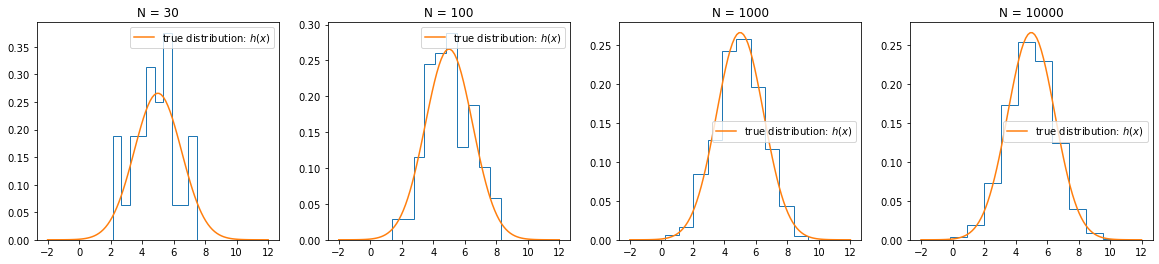

In [2]:
fig, ax = plt.subplots(1,4, figsize=(20,4))

N = [30, 100, 1000, 10000]  #try with 4 values of N
gauss = []


for i in range(len(N)):
    gauss.append(norm.rvs(loc=5, scale=1.5, size=N[i]))
    ax[i].hist(gauss[i], histtype='step', density=True, bins=10)
    ax[i].set_title('N = %.0f' %N[i])
    ax[i].plot(np.linspace(-2,12, 100), norm.pdf(np.linspace(-2,12, 100), loc=5, scale=1.5), label='true distribution: $h(x)$')
    ax[i].legend()

Now let's make things more complicated and let's try to evaluate errors! In the following cells I generate samples from the same normal distribution as above, for 50 values of N. For each N I extract data for M (M=100) times, in order to evaluate the errors on the sample mean and average.

So that if we **fix N**, we have M sets of N data from the same distribution, for each of these M sets we can evaluate the sample average ($\overline{x}_{j}$) and variance ($s_{j}$) with the known formulae (considering $j = 1,2,...,M$). Therefore the sample average and standard deviation at a given N are calculated as:

$$ \overline{x} = \frac{1}{M}\sum_{j=1}^{M}{\overline{x}_{j}} $$

$$ s = \frac{1}{M}\sum_{j=1}^{M}{s_{j}}$$

While the relative errors are evaluated as standard deviations of the quantities:

$$ \sigma_{\overline{x}} = \sqrt{\frac{1}{M-1}\sum_{j=1}^{M}(\overline{x}_{j} - \overline{x})^2 } $$

$$ \sigma_{s} = \sqrt{\frac{1}{M-1}\sum_{j=1}^{M}(s_{j} - s)^2 } $$


In [3]:
N = np.logspace(1, 5, 50).astype(int)  
print('N values: ', N)
M = 100

gauss = [[] for i in range(len(N))]   #extraction from the normal distribution
mean = [[] for i in range(len(N))]    #sample average
s = [[] for i in range(len(N))]       #sample std
err_m = [[] for i in range(len(N))]   #standard error of the mean
err_s = [[] for i in range(len(N))]   #error of s
means_0 = [] #here I store the average of each sample when N = N[0] to check the Student's distribution

for i in range(len(N)):
    mm = [[] for k in range(M)] #here I store the mean of each of the M extractions
    ss = [[] for k in range(M)] #here I store the std of each of the M extractions
    for j in range(M):
        gauss[i].append(norm.rvs(loc=5, scale=1.5, size=N[i]))
        mm[j] = np.mean(gauss[i][j])
        ss[j] = np.sqrt(np.sum((gauss[i][j]-mm[j])**2)/(N[i]-1))
    if i == 0:
        means_0 = mm
    mean[i] = np.mean(mm)
    s[i] = np.mean(ss)
    err_m[i] = np.std(mm, ddof=1)
    err_s[i] = np.std(ss, ddof=1)

N values:  [    10     12     14     17     21     25     30     37     44     54
     65     79     95    115    138    167    202    244    294    355
    429    517    625    754    910   1098   1325   1599   1930   2329
   2811   3393   4094   4941   5963   7196   8685  10481  12648  15264
  18420  22229  26826  32374  39069  47148  56898  68664  82864 100000]


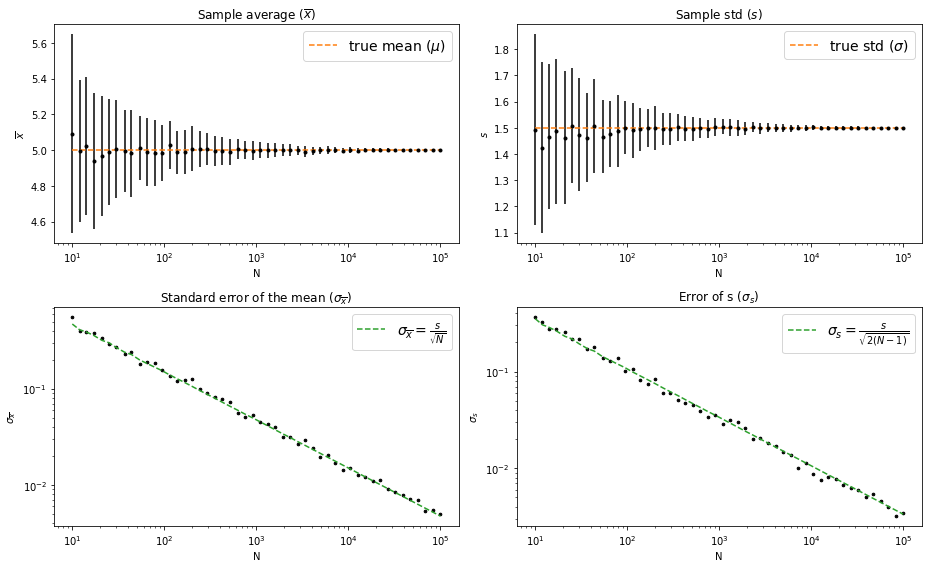

In [4]:
#plotting the results
fig, ax = plt.subplots(2,2,figsize=(13,8))
ax = ax.reshape(4)

ax[0].errorbar(N, mean, yerr=err_m, fmt='.k')
ax[1].errorbar(N, s, yerr=err_s, fmt='.k')
ax[2].scatter(N, err_m, color='black', s=7)
ax[3].scatter(N, err_s, color='black', s=7)

ax[0].plot(np.linspace(N[0], N[-1], 2), np.linspace(N[0], N[-1], 2)*0+5, c='tab:orange', ls='--', label='true mean ($\mu$)')
ax[1].plot(np.linspace(N[0], N[-1], 2), np.linspace(N[0], N[-1], 2)*0+1.5, c='tab:orange', ls='--', label='true std ($\sigma$)')
ax[2].plot(N, s/np.sqrt(N), color='tab:green', ls='--', label=r'$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}}$')
ax[3].plot(N, s/np.sqrt(2*(N-1)), color='tab:green', ls='--', label=r'$\sigma_s = \frac{s}{\sqrt{2(N-1)}}$')

ax[0].set_title('Sample average ($\overline{x}$)')
ax[1].set_title('Sample std ($s$)')
ax[2].set_title('Standard error of the mean ($\sigma_{\overline{x}}$)')
ax[3].set_title('Error of s ($\sigma_{s}$)')

ax[0].set_ylabel('$\overline{x}$')
ax[1].set_ylabel('$s$')
ax[2].set_ylabel('$\sigma_{\overline{x}}$')
ax[3].set_ylabel('$\sigma_{s}$')

for i in range(len(ax)):
    ax[i].set_xscale('log')
    ax[i].set_xlabel('N')
    ax[i].legend(fontsize=14)
    if i>1:
        ax[i].set_yscale('log')

fig.tight_layout()

As we can see the errors on the sample mean and variance are decreasing with N following the expected solutions, while the values of the sample mean and the sample standard deviation are approaching the true ones at high N. 